# General Imports

In [1]:
# General Imports
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re
import phik

from matplotlib import ticker
from scipy.stats import zscore
from datetime import datetime
from phik.report import plot_correlation_matrix
from phik import report
from phik import phik_matrix
from matplotlib.colors import ListedColormap

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
rent = pd.read_json(r'/Users/Admin/Experiments/re_model/json/rent_1315.json')
buy = pd.read_json(r'/Users/Admin/Experiments/re_model/json/2083_buy.json')
buy15jan = pd.read_json(r'/Users/Admin/Experiments/re_model/json/buy_15_jan.json')
buy17jan = pd.read_json(r'/Users/Admin/Experiments/re_model/json/buy_17_jan.json')

In [3]:
buy.head()

,property,price,location,bed_bath_size,agent_name,permit_number,url,breadcrumbs,amenities,description
0,"[Apartment, For Sale, Bayut - DUB225679, Ready...","{'currency': 'AED', 'amount': '4,600,000'}","Tanzanite, Tiara Residences, Palm Jumeirah, Dubai","{'bed': '3 Beds', 'bath': '4 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...
1,"[Apartment, For Sale, Bayut - L-202420, Ready,...","{'currency': 'AED', 'amount': '2,000,000'}","Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...","{'bed': '2 Beds', 'bath': '2 Baths', 'size': '...",Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer
2,"[Apartment, For Sale, Bayut - EMI220812, Ready...","{'currency': 'AED', 'amount': '740,000'}","The Wings, Arjan, Dubai","{'bed': '1 Bed', 'bath': '2 Baths', 'size': '7...",None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...
3,"[Apartment, For Sale, Bayut - MB-S-2302, Ready...","{'currency': 'AED', 'amount': '9,999,900'}","The Address Fountain Views 2, The Address Resi...","{'bed': '3 Beds', 'bath': '5 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:
4,"[Apartment, For Sale, Bayut - B-AS-69825, Read...","{'currency': 'AED', 'amount': '2,450,000'}","Paramount Hotel & Residences, Business Bay, Dubai","{'bed': '2 Beds', 'bath': '3 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti..."


In [4]:
buy15jan.head()

,property,price,location,bed_bath_size,agent_name,permit_number,url,breadcrumbs,amenities,description
0,"[Villa, For Sale, Bayut - B-VS-78247, Ready, D...","{'currency': 'AED', 'amount': '7,495,000'}","Estella Village, Victory Heights, Dubai Sports...","{'bed': '5 Beds', 'bath': '4 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/312271913-...,"Estella Village, Victory Heights, Dubai Sports...",{'amenities': 'Balcony or Terrace'},The villa benefits from a prime location with ...
1,"[Townhouse, For Sale, Bayut - TR-S-1531, Ready...","{'currency': 'AED', 'amount': '2,200,000'}","Bella Casa, Serena, Dubai","{'bed': '3 Beds', 'bath': '4 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/324450681-...,"Bella Casa, Serena, Dubai",{'amenities': 'Balcony or Terrace'},Property details:
2,"[Apartment, For Sale, Bayut - axc-3617890, Rea...","{'currency': 'AED', 'amount': '1,200,000'}","Damac Maison Majestine, Business Bay, Dubai","{'bed': 'Studio', 'bath': '1 Bath', 'size': '4...",Carla Santos,NaN,https://images.bayut.com/thumbnails/327633539-...,"Damac Maison Majestine, Business Bay, Dubai",{},PROPERTY FEATURES:
3,"[Villa, For Sale, Bayut - DUB135999, Ready, De...","{'currency': 'AED', 'amount': '6,000,000'}","Family Villa Area, Green Community East, Green...","{'bed': '5 Beds', 'bath': '5 Baths', 'size': '...",Ben Perry,NaN,https://images.bayut.com/thumbnails/281280176-...,"Family Villa Area, Green Community East, Green...",{'amenities': 'Swimming Pool'},"- 6,210 sq ft BUA"
4,"[Villa, For Sale, Bayut - DUL220076, Ready, De...","{'currency': 'AED', 'amount': '2,450,000'}","Mira 4, Mira, Reem, Dubai","{'bed': '3 Beds', 'bath': '3 Baths', 'size': '...",Jessica Sypen,NaN,https://images.bayut.com/thumbnails/289192307-...,"Mira 4, Mira, Reem, Dubai",{},haus & haus is delighted to present this Vacan...


In [5]:
#buy_44 = pd.read_csv(r'/Users/Admin/Experiments/athiraksathira Bayut master bayut/bayut/buy_44.csv')

In [6]:
len(buy)

40563

In [7]:
len(rent)

23427

In [8]:
len(buy15jan)

37485

In [9]:
len(buy17jan)

34677

In [10]:
# combine datasets using concat
df = pd.concat([buy, rent, buy15jan,buy17jan], ignore_index=True)
len(df)

136152

In [11]:
df.dtypes

property          object
price             object
location          object
bed_bath_size     object
agent_name        object
permit_number    float64
url               object
breadcrumbs       object
amenities         object
description       object
dtype: object

In [12]:
df.head()

,property,price,location,bed_bath_size,agent_name,permit_number,url,breadcrumbs,amenities,description
0,"[Apartment, For Sale, Bayut - DUB225679, Ready...","{'currency': 'AED', 'amount': '4,600,000'}","Tanzanite, Tiara Residences, Palm Jumeirah, Dubai","{'bed': '3 Beds', 'bath': '4 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...
1,"[Apartment, For Sale, Bayut - L-202420, Ready,...","{'currency': 'AED', 'amount': '2,000,000'}","Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...","{'bed': '2 Beds', 'bath': '2 Baths', 'size': '...",Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer
2,"[Apartment, For Sale, Bayut - EMI220812, Ready...","{'currency': 'AED', 'amount': '740,000'}","The Wings, Arjan, Dubai","{'bed': '1 Bed', 'bath': '2 Baths', 'size': '7...",None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...
3,"[Apartment, For Sale, Bayut - MB-S-2302, Ready...","{'currency': 'AED', 'amount': '9,999,900'}","The Address Fountain Views 2, The Address Resi...","{'bed': '3 Beds', 'bath': '5 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:
4,"[Apartment, For Sale, Bayut - B-AS-69825, Read...","{'currency': 'AED', 'amount': '2,450,000'}","Paramount Hotel & Residences, Business Bay, Dubai","{'bed': '2 Beds', 'bath': '3 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti..."


## Property fix

In [13]:
property_type = []
status = []
reference_number = []
furnishing = []
availability_date = []

for row in df['property']:
    property_type.append(row[0])
    status.append(row[1])
    reference_number.append(row[2])
    if len(row) >= 5:
        furnishing.append(row[3])
        availability_date.append(row[4])
    else:
        furnishing.append(None)
        availability_date.append(None)

In [14]:
df['property_type'] = property_type
df['status'] = status
df['reference_number'] = reference_number
df['furnishing'] = furnishing
df['availability_date'] = availability_date

# Drop the original 'property' column
df.drop('property', axis=1, inplace=True)

In [15]:
df.head()

,price,location,bed_bath_size,agent_name,permit_number,url,breadcrumbs,amenities,description,property_type,status,reference_number,furnishing,availability_date
0,"{'currency': 'AED', 'amount': '4,600,000'}","Tanzanite, Tiara Residences, Palm Jumeirah, Dubai","{'bed': '3 Beds', 'bath': '4 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Ready,"January 6, 2023"
1,"{'currency': 'AED', 'amount': '2,000,000'}","Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...","{'bed': '2 Beds', 'bath': '2 Baths', 'size': '...",Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Ready,"January 9, 2023"
2,"{'currency': 'AED', 'amount': '740,000'}","The Wings, Arjan, Dubai","{'bed': '1 Bed', 'bath': '2 Baths', 'size': '7...",None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Ready,"January 9, 2023"
3,"{'currency': 'AED', 'amount': '9,999,900'}","The Address Fountain Views 2, The Address Resi...","{'bed': '3 Beds', 'bath': '5 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Ready,Furnished
4,"{'currency': 'AED', 'amount': '2,450,000'}","Paramount Hotel & Residences, Business Bay, Dubai","{'bed': '2 Beds', 'bath': '3 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Ready,"December 5, 2022"


In [16]:
df['status'].value_counts

<bound method IndexOpsMixin.value_counts of 0         For Sale
1         For Sale
2         For Sale
3         For Sale
4         For Sale
            ...   
136147    For Sale
136148    For Sale
136149    For Sale
136150    For Sale
136151    For Sale
Name: status, Length: 136152, dtype: object>

In [17]:
df['furnishing'].values

array(['Ready', 'Ready', 'Ready', ..., 'Ready', 'Ready', 'Ready'],
      dtype=object)

In [18]:
df['property_type'][11252]

'Apartment'

In [19]:
df.dtypes

price                 object
location              object
bed_bath_size         object
agent_name            object
permit_number        float64
url                   object
breadcrumbs           object
amenities             object
description           object
property_type         object
status                object
reference_number      object
furnishing            object
availability_date     object
dtype: object

## Currency fix

In [20]:
currency = []
amount = []

for row in df['price']:
    currency.append(row['currency'])
    amount.append(row['amount'])
    
df['currency'] = currency
df['amount'] = amount

df.amount = df.amount.apply(lambda x: x.replace(',',''))

# Drop the original 'property' column
df.drop('price', axis=1, inplace=True)

## Location

In [21]:
df.head()

,location,bed_bath_size,agent_name,permit_number,url,breadcrumbs,amenities,description,property_type,status,reference_number,furnishing,availability_date,currency,amount
0,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai","{'bed': '3 Beds', 'bath': '4 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Ready,"January 6, 2023",AED,4600000
1,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...","{'bed': '2 Beds', 'bath': '2 Baths', 'size': '...",Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Ready,"January 9, 2023",AED,2000000
2,"The Wings, Arjan, Dubai","{'bed': '1 Bed', 'bath': '2 Baths', 'size': '7...",None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Ready,"January 9, 2023",AED,740000
3,"The Address Fountain Views 2, The Address Resi...","{'bed': '3 Beds', 'bath': '5 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Ready,Furnished,AED,9999900
4,"Paramount Hotel & Residences, Business Bay, Dubai","{'bed': '2 Beds', 'bath': '3 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Ready,"December 5, 2022",AED,2450000


## Property Type fix

In [22]:
df['property_type'].value_counts()

Apartment               107806
Villa                    16989
Townhouse                 8569
Penthouse                 1191
Residential Plot           724
Hotel Apartment            649
Residential Building       119
Residential Floor           76
Villa Compound              29
Name: property_type, dtype: int64

There are entire buildings and residential floors listed. Removing that.

In [23]:
len(df)

136152

In [24]:
df = df.drop(index=df[df.property_type == 'Residential Building'].index)
df = df.drop(index=df[df.property_type == 'Residential Floor'].index)
df = df.drop(index=df[df.property_type == 'Residential Plot'].index)

len(df)

135233

Let's assign "Villa Compounds" to "Villa".

In [25]:
df['property_type'] = df['property_type'].replace('Villa Compound', 'Villa')
len(df)

135233

## Location

In [26]:
df['location'][11132]

'Urban Oasis by Missoni, Business Bay, Dubai'

In [27]:
df.location = df.location.apply(lambda x: x.split(',')[-2].strip())

In [28]:
df['location'][11132]

'Business Bay'

## Bed & Bath

In [29]:
df['bed_bath_size'][12132]

{'bed': '2 Beds', 'bath': '2 Baths', 'size': '1,092 sqft'}

In [30]:
def divide_bed_bath_size(df):
    beds = []
    baths = []
    size = []
    for row in df['bed_bath_size']:
        beds.append(row['bed'])
        baths.append(row['bath'])
        size.append(row['size'])
    df['beds'] = beds
    df['baths'] = baths
    df['size_sqft'] = size
    return df

divide_bed_bath_size(df)

,location,bed_bath_size,agent_name,permit_number,url,breadcrumbs,amenities,description,property_type,status,reference_number,furnishing,availability_date,currency,amount,beds,baths,size_sqft
0,Palm Jumeirah,"{'bed': '3 Beds', 'bath': '4 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Ready,"January 6, 2023",AED,4600000,3 Beds,4 Baths,"2,266 sqft"
1,Dubai Marina,"{'bed': '2 Beds', 'bath': '2 Baths', 'size': '...",Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Ready,"January 9, 2023",AED,2000000,2 Beds,2 Baths,"1,350 sqft"
2,Arjan,"{'bed': '1 Bed', 'bath': '2 Baths', 'size': '7...",None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Ready,"January 9, 2023",AED,740000,1 Bed,2 Baths,776 sqft
3,Downtown Dubai,"{'bed': '3 Beds', 'bath': '5 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Ready,Furnished,AED,9999900,3 Beds,5 Baths,"1,993 sqft"
4,Business Bay,"{'bed': '2 Beds', 'bath': '3 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Ready,"December 5, 2022",AED,2450000,2 Beds,3 Baths,"1,250 sqft"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136147,Jumeirah Lake Towers (JLT),"{'bed': '3 Beds', 'bath': '2 Baths', 'size': '...",Jack Lampitt,NaN,https://images.bayut.com/thumbnails/311511267-...,"Bonnington Tower, JLT Cluster J, Jumeirah Lake...",{'amenities': 'View'},- Three Bedrooms,Apartment,For Sale,Bayut - L-201231,Ready,Furnished,AED,1875000,3 Beds,2 Baths,"1,352 sqft"
136148,Dubailand,"{'bed': '3 Beds', 'bath': '4 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/313637035-...,"Amaranta 3, Amaranta, Villanova, Dubailand, Dubai",{},Compound style.,Townhouse,For Sale,Bayut - CB-S-002770,Ready,"January 16, 2023",AED,1799999,3 Beds,4 Baths,"1,927 sqft"
136149,The Meadows,"{'bed': '5 Beds', 'bath': '5 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/304915333-...,"The Meadows 8, The Meadows, Dubai",{},-Type 8,Villa,For Sale,Bayut - ES-19406,Ready,"January 12, 2023",AED,8500000,5 Beds,5 Baths,"4,931 sqft"
136150,Dubai Sports City,"{'bed': '5 Beds', 'bath': '5 Baths', 'size': '...",None,NaN,https://images.bayut.com/thumbnails/305919010-...,"Esmeralda, Victory Heights, Dubai Sports City,...",{'amenities': 'Lawn or Garden'},- Fully Upgraded,Villa,For Sale,Bayut - DUB170130,Ready,Unfurnished,AED,11450000,5 Beds,5 Baths,"5,832 sqft"


In [31]:
# Drop the original 'bed_bath_size	' column
df.drop('bed_bath_size', axis=1, inplace=True)

In [32]:
df['beds'] = df['beds'].str.replace(' Beds', '')
df['beds'] = df['beds'].str.replace(' Bed', '')
df['baths'] = df['baths'].str.replace(' Baths', '')
df['baths'] = df['baths'].str.replace(' Bath', '')
df.head()

,location,agent_name,permit_number,url,breadcrumbs,amenities,description,property_type,status,reference_number,furnishing,availability_date,currency,amount,beds,baths,size_sqft
0,Palm Jumeirah,None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Ready,"January 6, 2023",AED,4600000,3,4,"2,266 sqft"
1,Dubai Marina,Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Ready,"January 9, 2023",AED,2000000,2,2,"1,350 sqft"
2,Arjan,None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Ready,"January 9, 2023",AED,740000,1,2,776 sqft
3,Downtown Dubai,None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Ready,Furnished,AED,9999900,3,5,"1,993 sqft"
4,Business Bay,None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Ready,"December 5, 2022",AED,2450000,2,3,"1,250 sqft"


In [33]:
# Checking for missing values
print(df['baths'].isna().sum())

# Dropping missing values
df.dropna(subset=['baths'], inplace=True)

# Filling missing values
df['baths'].fillna(value=0, inplace=True)

# Converting the column to int
df['baths'] = df['baths'].astype(int)

875


In [34]:
print(df['baths'].isna().sum())

0


In [35]:
df['beds'] = df['beds'].replace({'Studio': 0})
df['beds'] = df['beds'].astype(int)

Changing the Studio values to 0.

In [36]:
df.beds.value_counts()

1     39020
2     37867
3     23788
0     13926
4     11713
5      5409
6      1857
7       548
8       121
10       47
9        37
12       12
11        6
21        4
18        2
14        1
Name: beds, dtype: int64

The number of bedrooms over 6 is quite small, therefore I am goint to remove them in order to minimize the risk of outliers. 

In [37]:
len(df)

134358

In [38]:
df = df.drop(index=df[df.beds > 6].index)
len(df)

133580

## Size SQFT

In [39]:
print(len(df))

133580


In [40]:
df = df.drop(index=df[df.size_sqft <= '0'].index)
df = df.drop(index=df[df.amount <= '0'].index)
print(len(df))

133580


In [41]:
df['size_sqft'] = df['size_sqft'].str.replace(',', '')
df['size_sqft'] = df['size_sqft'].str.replace(' sqft', '')
df.head()

,location,agent_name,permit_number,url,breadcrumbs,amenities,description,property_type,status,reference_number,furnishing,availability_date,currency,amount,beds,baths,size_sqft
0,Palm Jumeirah,None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Ready,"January 6, 2023",AED,4600000,3,4,2266
1,Dubai Marina,Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Ready,"January 9, 2023",AED,2000000,2,2,1350
2,Arjan,None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Ready,"January 9, 2023",AED,740000,1,2,776
3,Downtown Dubai,None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Ready,Furnished,AED,9999900,3,5,1993
4,Business Bay,None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Ready,"December 5, 2022",AED,2450000,2,3,1250


## Size SQM

In [42]:
df.size_sqft.value_counts()

850     660
900     595
800     586
1100    557
1400    554
       ... 
8452      1
2796      1
6927      1
5198      1
7122      1
Name: size_sqft, Length: 6033, dtype: int64

In [43]:
df['size_sqft']=df['size_sqft'].astype(float)
df['size_sqm'] = df['size_sqft'] * (0.093)
df['size_sqm'] = df['size_sqm'].round()
df.head()

,location,agent_name,permit_number,url,breadcrumbs,amenities,description,property_type,status,reference_number,furnishing,availability_date,currency,amount,beds,baths,size_sqft,size_sqm
0,Palm Jumeirah,None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Ready,"January 6, 2023",AED,4600000,3,4,2266.0,211.0
1,Dubai Marina,Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Ready,"January 9, 2023",AED,2000000,2,2,1350.0,126.0
2,Arjan,None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Ready,"January 9, 2023",AED,740000,1,2,776.0,72.0
3,Downtown Dubai,None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Ready,Furnished,AED,9999900,3,5,1993.0,185.0
4,Business Bay,None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Ready,"December 5, 2022",AED,2450000,2,3,1250.0,116.0


## Agents

In [44]:
df['agent_name'].value_counts()

Peace Homes Real Estate (Business Bay)    521
ABH REAL ESTATE-ADMIN1                    518
Morgan Owen                               364
PEACE HOMES REAL ESTATE                   338
Axle Rose                                 235
                                         ... 
Shah                                        1
Asad Shahzad                                1
Moosa Omer Al Hammadi                       1
Ahmed Saad                                  1
Larry Omoniyi                               1
Name: agent_name, Length: 6215, dtype: int64

Removing agencies, keeping agents.

Here are the top five real estate agents by the number of active properties

In [45]:
df['agent_name'].value_counts().head()

Peace Homes Real Estate (Business Bay)    521
ABH REAL ESTATE-ADMIN1                    518
Morgan Owen                               364
PEACE HOMES REAL ESTATE                   338
Axle Rose                                 235
Name: agent_name, dtype: int64

In [46]:
exclude_list = ['real', 'estate', 'dubai', 'property', 'properties', 'luxury','Muhammad']

def remove_agent_name(df):
    for word in exclude_list:
        df.loc[df['agent_name'].str.contains(word, case=False, na=False), 'agent_name'] = None
    return df

df = remove_agent_name(df)
df.head()

,location,agent_name,permit_number,url,breadcrumbs,amenities,description,property_type,status,reference_number,furnishing,availability_date,currency,amount,beds,baths,size_sqft,size_sqm
0,Palm Jumeirah,None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",{},Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Ready,"January 6, 2023",AED,4600000,3,4,2266.0,211.0
1,Dubai Marina,Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",{'amenities': 'View'},- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Ready,"January 9, 2023",AED,2000000,2,2,1350.0,126.0
2,Arjan,None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",{},Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Ready,"January 9, 2023",AED,740000,1,2,776.0,72.0
3,Downtown Dubai,None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",{'amenities': 'View'},Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Ready,Furnished,AED,9999900,3,5,1993.0,185.0
4,Business Bay,None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",{'amenities': 'Sauna'},"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Ready,"December 5, 2022",AED,2450000,2,3,1250.0,116.0


## Amenities

In [47]:
df['amenities'].value_counts()

{}                                     43571
{'amenities': 'Freehold'}              22992
{'amenities': 'View'}                  13910
{'amenities': '24 Hours Concierge'}     9043
{'amenities': 'CCTV Security'}          5966
                                       ...  
{'amenities': ': 27'}                      1
{'amenities': ': 38'}                      1
{'amenities': ': 36'}                      1
{'amenities': ': 2024'}                    1
{'amenities': ': 2023'}                    1
Name: amenities, Length: 90, dtype: int64

In [48]:
df['amenities'] = df['amenities'].apply(lambda x: None if x == "{}" else x.get('amenities', None))


In [49]:
df['amenities'].value_counts()

Freehold              22992
View                  13910
24 Hours Concierge     9043
CCTV Security          5966
Maids Room             5940
                      ...  
: 27                      1
: 38                      1
: 36                      1
: 2024                    1
: 2023                    1
Name: amenities, Length: 89, dtype: int64

In [50]:
df.head()

,location,agent_name,permit_number,url,breadcrumbs,amenities,description,property_type,status,reference_number,furnishing,availability_date,currency,amount,beds,baths,size_sqft,size_sqm
0,Palm Jumeirah,None,NaN,https://images.bayut.com/thumbnails/311808351-...,"Tanzanite, Tiara Residences, Palm Jumeirah, Dubai",None,Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Ready,"January 6, 2023",AED,4600000,3,4,2266.0,211.0
1,Dubai Marina,Rebecca Boulcott,NaN,https://images.bayut.com/thumbnails/328254607-...,"Al Sahab Tower 2, Al Sahab Tower, Dubai Marina...",View,- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Ready,"January 9, 2023",AED,2000000,2,2,1350.0,126.0
2,Arjan,None,NaN,https://images.bayut.com/thumbnails/326168944-...,"The Wings, Arjan, Dubai",None,Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Ready,"January 9, 2023",AED,740000,1,2,776.0,72.0
3,Downtown Dubai,None,NaN,https://images.bayut.com/thumbnails/327319833-...,"The Address Fountain Views 2, The Address Resi...",View,Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Ready,Furnished,AED,9999900,3,5,1993.0,185.0
4,Business Bay,None,NaN,https://images.bayut.com/thumbnails/222435414-...,"Paramount Hotel & Residences, Business Bay, Dubai",Sauna,"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Ready,"December 5, 2022",AED,2450000,2,3,1250.0,116.0


In [51]:
df['amenities'].value_counts()

Freehold              22992
View                  13910
24 Hours Concierge     9043
CCTV Security          5966
Maids Room             5940
                      ...  
: 27                      1
: 38                      1
: 36                      1
: 2024                    1
: 2023                    1
Name: amenities, Length: 89, dtype: int64

In [52]:
# filter rows where breadcrumbs are "Al Mankhool, Bur Dubai, Dubai"
#filtered_data = df[df['breadcrumbs'] == 'Downtown Views II, Downtown Dubai, Dubai']
#filtered_data

## Furnishing & Availability date

- Values from these two columns were mixed up. 
- Scrapy code should be fixed. 
- Also additional scrapy code should be created for collecting the Title (not just Description) of the property -> to have less Unknown values in these columns.

In [53]:
df['furnishing'].value_counts()

Ready                67484
Off-Plan             43056
Unfurnished          12491
Furnished             4861
January 9, 2023         55
January 6, 2023         36
January 13, 2023        24
January 10, 2023        23
January 11, 2023        22
January 12, 2023        21
December 19, 2022       20
December 21, 2022       18
January 3, 2023         17
December 26, 2022       17
December 23, 2022       15
January 4, 2023         15
December 30, 2022       13
January 5, 2023         10
December 22, 2022        9
December 28, 2022        8
December 29, 2022        8
January 2, 2023          8
December 27, 2022        7
December 16, 2022        7
December 20, 2022        5
December 15, 2022        5
Name: furnishing, dtype: int64

In [54]:
import re

# Define a regular expression pattern to match dates in the format "January 9, 2023"
date_pattern = re.compile(r'^(?:January|FebruaryORMarch|April|May|June|July|August|September|October|November|December)\s\d{1,2},\s\d{4}$')

# Use the `pd.notna()` function to filter out rows with missing values in the 'furnishing' column
# Use the `str.contains()` method to filter rows where the 'furnishing' column matches the date pattern
filtered_df = df[pd.notna(df['furnishing']) & df['furnishing'].str.contains(date_pattern)]

# Use the `value_counts()` method to see the value counts of the 'status' 
# column for the filtered data with the missing values as well, if any.
print(filtered_df['status'].value_counts(dropna=False))

For Rent    363
Name: status, dtype: int64


Basically only properties for rent happen to have a DATE values in the Furnishing column.

Let's change values to Unknown and later use Desctiption to add actual Furnishing values to these properties.

In [55]:
# Use the `loc` function to change the values of the 'furnishing' column for the filtered rows to "Unknown"
df.loc[filtered_df.index, 'furnishing'] = "Unknown"

In [56]:
# Define regular expressions to match "Furnished" and "Unfurnished"
furnished_pattern = re.compile(r'\bfurnished\b', re.IGNORECASE)
unfurnished_pattern = re.compile(r'\bunfurnished\b', re.IGNORECASE)

# Use the `str.contains()` method to filter rows where the 'description' column contains "Unfurnished"
unfurnished_df = df[(df['description'].str.contains(unfurnished_pattern)) & (df['furnishing']=="Unknown")]

# Use the `loc` function to set the values of the 'furnishing' column for the filtered rows to "Unfurnished"
df.loc[unfurnished_df.index, 'furnishing'] = "Unfurnished"

# Use the `str.contains()` method to filter rows where the 'description' column contains "Furnished"
furnished_df = df[(df['description'].str.contains(furnished_pattern)) & (df['furnishing']=="Unknown")]

# Use the `loc` function to set the values of the 'furnishing' column for the filtered rows to "Furnished"
df.loc[furnished_df.index, 'furnishing'] = "Furnished"

In [57]:
df['furnishing'].value_counts()

Ready          67484
Off-Plan       43056
Unfurnished    12497
Furnished       4874
Unknown          344
Name: furnishing, dtype: int64

In [58]:
df.availability_date.value_counts()

Unfurnished           40526
Furnished             19855
December 13, 2022      1773
December 12, 2022      1628
January 13, 2023       1570
                      ...  
March 17, 2019            1
March 17, 2020            1
September 22, 2020        1
March 13, 2022            1
November 18, 2019         1
Name: availability_date, Length: 480, dtype: int64

In [59]:
df.query("availability_date == 'Unfurnished'")['furnishing'].value_counts()

Ready       24400
Off-Plan    16126
Name: furnishing, dtype: int64

In [60]:
df['furnishing'].value_counts()

Ready          67484
Off-Plan       43056
Unfurnished    12497
Furnished       4874
Unknown          344
Name: furnishing, dtype: int64

In [61]:
df.query("status == 'For Rent'")['furnishing'].value_counts()

Unfurnished    12497
Furnished       4874
Unknown          344
Name: furnishing, dtype: int64

In [62]:
df.query("status == 'For Sale'")['availability_date'].value_counts().head()

Unfurnished          40526
Furnished            19855
December 13, 2022     1526
December 12, 2022     1408
December 27, 2022     1087
Name: availability_date, dtype: int64

In [63]:
df.query("status == 'For Sale'")['furnishing'].value_counts().head()

Ready       67484
Off-Plan    43056
Name: furnishing, dtype: int64

In [64]:
df['availability_date'].value_counts()

Unfurnished           40526
Furnished             19855
December 13, 2022      1773
December 12, 2022      1628
January 13, 2023       1570
                      ...  
March 17, 2019            1
March 17, 2020            1
September 22, 2020        1
March 13, 2022            1
November 18, 2019         1
Name: availability_date, Length: 480, dtype: int64

**For Sale:**
from `furnishing` to `availability_date` -> Ready 24159 and Off-Plan 16404
- create temp column: temp_availability_date

**For Sale:**
from `availability_date` to `furnishing` -> Unfurnished 15132 and Furnished 8012
- create temp column: temp_furnishing

- move values from temp_availability_date to availability_date
- move values from temp_furnishing to furnishing

Fixing "Furnishing" based on description

In [65]:
# Use the `pd.notna()` function to filter out rows with missing values in the 'furnishing' column
df = df[pd.notna(df['furnishing'])]

# Define regular expressions to match "ready" and "off-plan"
ready_pattern = re.compile(r'\bready\b', re.IGNORECASE)
offplan_pattern = re.compile(r'\boff-plan\b', re.IGNORECASE)

# Use the `str.contains()` method to filter rows where the 'furnishing' column contains "ready"
readydf = df[(df['furnishing'].str.contains(ready_pattern))]

# Use the `loc` function to set the values of the 'furnishing' column for the filtered rows to "availability_date"
df.loc[readydf.index, 'temp_availability_date'] = "Ready"

# Use the `str.contains()` method to filter rows where the 'furnishing' column contains "off-plan"
offplandf = df[(df['furnishing'].str.contains(offplan_pattern))]

# Use the loc function to set the values of the 'availability_date' column for the filtered rows to "Off-Plan"
df.loc[offplandf.index, 'temp_availability_date'] = "Off-Plan"

In [66]:
df['furnishing'].value_counts()

Ready          67484
Off-Plan       43056
Unfurnished    12497
Furnished       4874
Unknown          344
Name: furnishing, dtype: int64

In [67]:
# Define regular expressions to match "Unfurnished" and "Furnished"
unfurnished_pattern = re.compile(r'\bunfurnished\b', re.IGNORECASE)
furnished_pattern = re.compile(r'\bfurnished\b', re.IGNORECASE)

# Use the str.contains() method to filter rows where the 'description' column contains "Unfurnished"
unfurnished_df = df[df['description'].str.contains(unfurnished_pattern) & ((df['furnishing']=="Ready") | (df['furnishing']=="Off-Plan") | (df['furnishing']=="Unknown"))]

# Use the loc function to set the values of the 'furnishing' column for the filtered rows to "Unfurnished"
df.loc[unfurnished_df.index, 'furnishing'] = "Unfurnished"

#Use the str.contains() method to filter rows where the 'description' column contains "Furnished"
furnished_df = df[df['description'].str.contains(furnished_pattern) & ((df['furnishing']=="Ready") | (df['furnishing']=="Off-Plan") | (df['furnishing']=="Unknown"))]

# Use the loc function to set the values of the 'furnishing' column for the filtered rows to "Furnished"
df.loc[furnished_df.index, 'furnishing'] = "Furnished"

#Use the value_counts() method to see the new value counts of the 'furnishing' column
print(df['furnishing'].value_counts())


Ready          65805
Off-Plan       42604
Unfurnished    12890
Furnished       6612
Unknown          344
Name: furnishing, dtype: int64


Values from `Description` were successfully added to `Furnishing`. 

In [68]:
df['furnishing'].value_counts()

Ready          65805
Off-Plan       42604
Unfurnished    12890
Furnished       6612
Unknown          344
Name: furnishing, dtype: int64

In [69]:
df.query("furnishing == 'Ready'")['furnishing'].value_counts().head()

Ready    65805
Name: furnishing, dtype: int64

In [70]:
df.query("status == 'For Rent'")['furnishing'].value_counts().head()

Unfurnished    12497
Furnished       4874
Unknown          344
Name: furnishing, dtype: int64

In [71]:
# Use the `pd.notna()` function to filter out rows with missing values in the 'furnishing' column
df = df[pd.notna(df['furnishing'])]

# Define regular expressions to match "ready" and "off-plan"
ready_pattern = re.compile(r'\bready\b', re.IGNORECASE)
offplan_pattern = re.compile(r'\boff-plan\b', re.IGNORECASE)

# Use the `str.contains()` method to filter rows where the 'furnishing' column contains "ready"
readydf = df[(df['furnishing'].str.contains(ready_pattern))]

# Use the `loc` function to set the values of the 'furnishing' column for the filtered rows to "availability_date"
df.loc[readydf.index, 'temp_availability_date'] = "Ready"

# Use the `str.contains()` method to filter rows where the 'furnishing' column contains "off-plan"
offplandf = df[(df['furnishing'].str.contains(offplan_pattern))]

# Use the loc function to set the values of the 'availability_date' column for the filtered rows to "Off-Plan"
df.loc[offplandf.index, 'temp_availability_date'] = "Off-Plan"

In [72]:
#Use the pd.notna() function to filter out rows with missing values in the 'availability_date' column
df = df[pd.notna(df['availability_date'])]

#Define regular expressions to match "furnished" and "unfurnished"
furnished_pattern = re.compile(r'\bfurnished\b', re.IGNORECASE)
unfurnished_pattern = re.compile(r'\bunfurnished\b', re.IGNORECASE)

#Use the str.contains() method to filter rows where the 'availability_date' column contains "furnished"
furnished_df = df[df['availability_date'].str.contains(furnished_pattern)]

#Use the loc function to set the values of the 'temp_furnishing' column for the filtered rows to "Furnished"
df.loc[furnished_df.index, 'temp_furnishing'] = "Furnished"

#Use the str.contains() method to filter rows where the 'availability_date' column contains "unfurnished"
unfurnished_df = df[df['availability_date'].str.contains(unfurnished_pattern)]

#Use the loc function to set the values of the 'temp_furnishing' column for the filtered rows to "Unfurnished"
df.loc[unfurnished_df.index, 'temp_furnishing'] = "Unfurnished"

In [73]:
df['temp_furnishing'].value_counts()

Unfurnished    40526
Furnished      19855
Name: temp_furnishing, dtype: int64

In [74]:
# Moving values from temp columns
df.loc[df['temp_furnishing'].isin(['Furnished', 'Unfurnished']), 'furnishing'] = df['temp_furnishing']
df.loc[df['temp_availability_date'].isin(['Ready', 'Off-Plan']), 'availability_date'] = df['temp_availability_date']

# Droping temp columns
df = df.drop(columns=['temp_furnishing', 'temp_availability_date'])

In [75]:
df['furnishing'].value_counts()

Unfurnished    53195
Ready          28465
Furnished      25248
Off-Plan       21003
Unknown          344
Name: furnishing, dtype: int64

In [76]:
#Use the loc function to filter rows where the 'furnishing' column is equal to "Ready" or "Off-Plan"
ready_or_offplan_df = df.loc[(df['furnishing'] == "Ready") | (df['furnishing'] == "Off-Plan")]

#Use the loc function to set the values of the 'furnishing' column for the filtered rows to "Unknown"
df.loc[ready_or_offplan_df.index, 'furnishing'] = "Unknown"

#Use the value_counts() method to see the new value counts of the 'furnishing' column

print(df['furnishing'].value_counts())

Unfurnished    53195
Unknown        49812
Furnished      25248
Name: furnishing, dtype: int64


In [77]:
df['availability_date'].value_counts()

Ready                67484
Off-Plan             43056
January 13, 2023       487
January 11, 2023       480
January 10, 2023       479
                     ...  
January 14, 2022         1
December 27, 2021        1
April 25, 2019           1
January 6, 2022          1
March 19, 2022           1
Name: availability_date, Length: 402, dtype: int64

Columns Availability_date and Furnishing are successfully fixed.

## Columns to drop

In [78]:
df.drop(columns=['permit_number', 'url','breadcrumbs','currency'], inplace=True)

In [79]:
df.head()

,location,agent_name,amenities,description,property_type,status,reference_number,furnishing,availability_date,amount,beds,baths,size_sqft,size_sqm
0,Palm Jumeirah,None,None,Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Unknown,Ready,4600000,3,4,2266.0,211.0
1,Dubai Marina,Rebecca Boulcott,View,- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Unknown,Ready,2000000,2,2,1350.0,126.0
2,Arjan,None,None,Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Unknown,Ready,740000,1,2,776.0,72.0
3,Downtown Dubai,None,View,Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Furnished,Ready,9999900,3,5,1993.0,185.0
4,Business Bay,None,Sauna,"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Unknown,Ready,2450000,2,3,1250.0,116.0


## Additional Currencies

In [80]:
df.rename(columns={'amount':'price_aed'}, inplace=True)

In [81]:
df.price_aed = df.price_aed.astype(float)

In [82]:
#Create a new column 'price_eur' in the DataFrame
df['price_eur'] = df['price_aed'] * 0.25

#Create a new column 'price_usd' in the DataFrame
df['price_usd'] = df['price_aed'] * 0.27

#Create a new column 'price_sek' in the DataFrame
df['price_sek'] = df['price_aed'] * 2.84

#Create a new column 'price_rub' in the DataFrame
df['price_rub'] = df['price_aed'] * 2.84

#Print the DataFrame to check the new columns
df.head()

,location,agent_name,amenities,description,property_type,status,reference_number,furnishing,availability_date,price_aed,beds,baths,size_sqft,size_sqm,price_eur,price_usd,price_sek,price_rub
0,Palm Jumeirah,None,None,Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Unknown,Ready,4600000.0,3,4,2266.0,211.0,1150000.0,1242000.0,13064000.0,13064000.0
1,Dubai Marina,Rebecca Boulcott,View,- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Unknown,Ready,2000000.0,2,2,1350.0,126.0,500000.0,540000.0,5680000.0,5680000.0
2,Arjan,None,None,Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Unknown,Ready,740000.0,1,2,776.0,72.0,185000.0,199800.0,2101600.0,2101600.0
3,Downtown Dubai,None,View,Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Furnished,Ready,9999900.0,3,5,1993.0,185.0,2499975.0,2699973.0,28399716.0,28399716.0
4,Business Bay,None,Sauna,"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Unknown,Ready,2450000.0,2,3,1250.0,116.0,612500.0,661500.0,6958000.0,6958000.0


In [83]:
#sorted(list(df.location.value_counts().keys()))

## Availability dates

#availability_date

In [84]:
#df['availability_date'] = pd.to_datetime(df['availability_date'],format='%m%d%Y')

In [85]:
df.head()

,location,agent_name,amenities,description,property_type,status,reference_number,furnishing,availability_date,price_aed,beds,baths,size_sqft,size_sqm,price_eur,price_usd,price_sek,price_rub
0,Palm Jumeirah,None,None,Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Unknown,Ready,4600000.0,3,4,2266.0,211.0,1150000.0,1242000.0,13064000.0,13064000.0
1,Dubai Marina,Rebecca Boulcott,View,- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Unknown,Ready,2000000.0,2,2,1350.0,126.0,500000.0,540000.0,5680000.0,5680000.0
2,Arjan,None,None,Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Unknown,Ready,740000.0,1,2,776.0,72.0,185000.0,199800.0,2101600.0,2101600.0
3,Downtown Dubai,None,View,Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Furnished,Ready,9999900.0,3,5,1993.0,185.0,2499975.0,2699973.0,28399716.0,28399716.0
4,Business Bay,None,Sauna,"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Unknown,Ready,2450000.0,2,3,1250.0,116.0,612500.0,661500.0,6958000.0,6958000.0


## Price per SQM
USD & SEK

In [86]:
df['sqm_price_sek']=df['price_sek'].astype(float)/df['size_sqm'].astype(float)
df['sqm_price_sek']=df['sqm_price_sek'].round()
df['sqm_price_usd']=df['price_usd'].astype(float)/df['size_sqm'].astype(float)
df['sqm_price_usd']=df['sqm_price_usd'].round()
df.head()

,location,agent_name,amenities,description,property_type,status,reference_number,furnishing,availability_date,price_aed,beds,baths,size_sqft,size_sqm,price_eur,price_usd,price_sek,price_rub,sqm_price_sek,sqm_price_usd
0,Palm Jumeirah,None,None,Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Unknown,Ready,4600000.0,3,4,2266.0,211.0,1150000.0,1242000.0,13064000.0,13064000.0,61915.0,5886.0
1,Dubai Marina,Rebecca Boulcott,View,- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Unknown,Ready,2000000.0,2,2,1350.0,126.0,500000.0,540000.0,5680000.0,5680000.0,45079.0,4286.0
2,Arjan,None,None,Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Unknown,Ready,740000.0,1,2,776.0,72.0,185000.0,199800.0,2101600.0,2101600.0,29189.0,2775.0
3,Downtown Dubai,None,View,Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Furnished,Ready,9999900.0,3,5,1993.0,185.0,2499975.0,2699973.0,28399716.0,28399716.0,153512.0,14594.0
4,Business Bay,None,Sauna,"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Unknown,Ready,2450000.0,2,3,1250.0,116.0,612500.0,661500.0,6958000.0,6958000.0,59983.0,5703.0


# EDA

In [87]:
len(df)

128255

In [88]:
#Droping duplicates
df = df.drop_duplicates()
len(df)

80777

In [89]:
df['property_type'].value_counts()

Apartment          63053
Villa              10855
Townhouse           5652
Penthouse            762
Hotel Apartment      455
Name: property_type, dtype: int64

In [90]:
df.beds.value_counts()

1    23134
2    22519
3    14615
0     8179
4     7495
5     3586
6     1249
Name: beds, dtype: int64

In [91]:
df.baths.value_counts()

2     25257
3     17914
1     15399
4     11207
5      6132
6      3209
7      1253
8       331
9        46
10       26
11        2
20        1
Name: baths, dtype: int64

In [92]:
df.columns

Index(['location', 'agent_name', 'amenities', 'description', 'property_type',
       'status', 'reference_number', 'furnishing', 'availability_date',
       'price_aed', 'beds', 'baths', 'size_sqft', 'size_sqm', 'price_eur',
       'price_usd', 'price_sek', 'price_rub', 'sqm_price_sek',
       'sqm_price_usd'],
      dtype='object')

In [93]:
df.dtypes

location              object
agent_name            object
amenities             object
description           object
property_type         object
status                object
reference_number      object
furnishing            object
availability_date     object
price_aed            float64
beds                   int64
baths                  int64
size_sqft            float64
size_sqm             float64
price_eur            float64
price_usd            float64
price_sek            float64
price_rub            float64
sqm_price_sek        float64
sqm_price_usd        float64
dtype: object

# BUY vs RENT

In [94]:
# filter rows where status is For Sale
filtered_buy = df[df['status'] == 'For Sale']
filtered_buy.head()

,location,agent_name,amenities,description,property_type,status,reference_number,furnishing,availability_date,price_aed,beds,baths,size_sqft,size_sqm,price_eur,price_usd,price_sek,price_rub,sqm_price_sek,sqm_price_usd
0,Palm Jumeirah,None,None,Now available is this well sized 3 Bedroom apa...,Apartment,For Sale,Bayut - DUB225679,Unknown,Ready,4600000.0,3,4,2266.0,211.0,1150000.0,1242000.0,13064000.0,13064000.0,61915.0,5886.0
1,Dubai Marina,Rebecca Boulcott,View,- Vacant On Transfer,Apartment,For Sale,Bayut - L-202420,Unknown,Ready,2000000.0,2,2,1350.0,126.0,500000.0,540000.0,5680000.0,5680000.0,45079.0,4286.0
2,Arjan,None,None,Jake and haus & haus are delighted to present ...,Apartment,For Sale,Bayut - EMI220812,Unknown,Ready,740000.0,1,2,776.0,72.0,185000.0,199800.0,2101600.0,2101600.0,29189.0,2775.0
3,Downtown Dubai,None,View,Property Details:,Apartment,For Sale,Bayut - MB-S-2302,Furnished,Ready,9999900.0,3,5,1993.0,185.0,2499975.0,2699973.0,28399716.0,28399716.0,153512.0,14594.0
4,Business Bay,None,Sauna,"and Residences , A luxury hotel and residenti...",Apartment,For Sale,Bayut - B-AS-69825,Unknown,Ready,2450000.0,2,3,1250.0,116.0,612500.0,661500.0,6958000.0,6958000.0,59983.0,5703.0


In [95]:
# filter rows where status is For Sale
filtered_rent = df[df['status'] == 'For Rent']
filtered_rent.head()

,location,agent_name,amenities,description,property_type,status,reference_number,furnishing,availability_date,price_aed,beds,baths,size_sqft,size_sqm,price_eur,price_usd,price_sek,price_rub,sqm_price_sek,sqm_price_usd
40563,Jumeirah Village Circle (JVC),RRE 7,CCTV Security,"DED# 1107833, RERA# 32253, ORN# 32253",Apartment,For Rent,Bayut - 4586-Ap-R-0220,Furnished,"January 9, 2023",65000.0,0,1,450.0,42.0,16250.0,17550.0,184600.0,184600.0,4395.0,418.0
40564,Dubai Hills Estate,None,None,haus & haus is pleased to bring to the market ...,Apartment,For Rent,Bayut - LEA230077_L,Unknown,"January 10, 2023",105000.0,2,1,732.0,68.0,26250.0,28350.0,298200.0,298200.0,4385.0,417.0
40565,Dubai Hills Estate,Johannes Badenhorst,View,Sidra is the first development of the Sidra vi...,Villa,For Rent,Bayut - TREO-R-17503,Unfurnished,"January 9, 2023",560000.0,5,5,4283.0,398.0,140000.0,151200.0,1590400.0,1590400.0,3996.0,380.0
40566,Arabian Ranches 3,None,Maids Room,- 3 bedrooms + maid,Townhouse,For Rent,Bayut - TREO-R-18305,Unfurnished,"January 13, 2023",160000.0,3,3,1940.0,180.0,40000.0,43200.0,454400.0,454400.0,2524.0,240.0
40567,Town Square,None,24 Hours Concierge,PROPERTY FEATURES:,Apartment,For Rent,Bayut - DLAND-ST-ZAHRA-2BR,Furnished,"January 11, 2023",75000.0,2,2,883.0,82.0,18750.0,20250.0,213000.0,213000.0,2598.0,247.0


## Corr Matrix

In [96]:
# BUY
corr_matrix = filtered_buy[['beds','baths','size_sqft','price_aed']].corr()
#sns.heatmap(corr_matrix)
corr_matrix

,beds,baths,size_sqft,price_aed
beds,1.000000,0.916606,0.197571,0.379513
baths,0.916606,1.000000,0.193894,0.400544
size_sqft,0.197571,0.193894,1.000000,0.175551
price_aed,0.379513,0.400544,0.175551,1.000000


In [97]:
# RENT
corr_matrix = filtered_rent[['beds','baths','size_sqft','price_aed']].corr()
#sns.heatmap(corr_matrix)
corr_matrix

,beds,baths,size_sqft,price_aed
beds,1.000000,0.914084,0.736474,0.530344
baths,0.914084,1.000000,0.749804,0.541414
size_sqft,0.736474,0.749804,1.000000,0.552993
price_aed,0.530344,0.541414,0.552993,1.000000


## Location & Property Type

In [98]:
# BUY
filtered_buy['property_type'].value_counts()

Apartment          48569
Villa               8419
Townhouse           5050
Penthouse            708
Hotel Apartment      323
Name: property_type, dtype: int64

In [99]:
# RENT
filtered_rent['property_type'].value_counts()

Apartment          14484
Villa               2436
Townhouse            602
Hotel Apartment      132
Penthouse             54
Name: property_type, dtype: int64

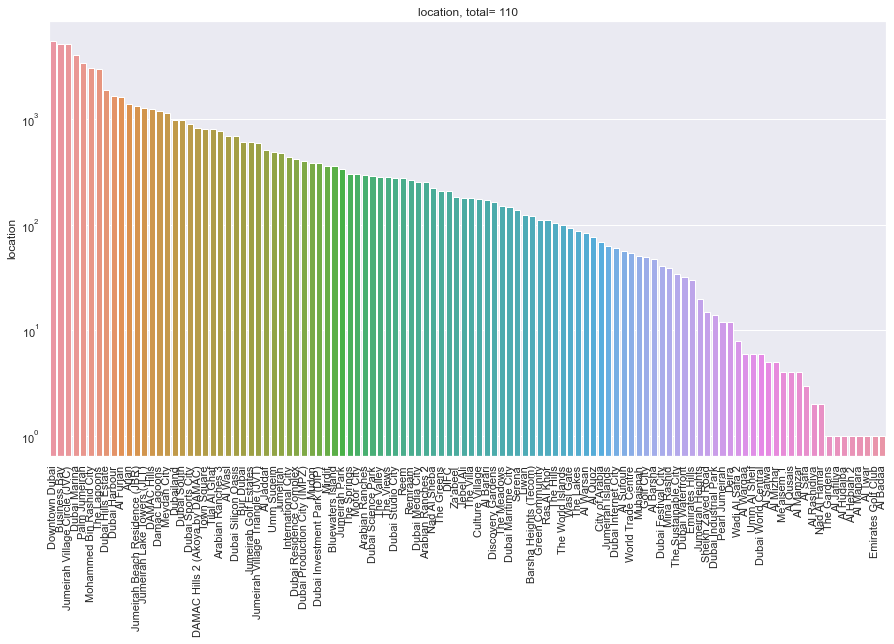

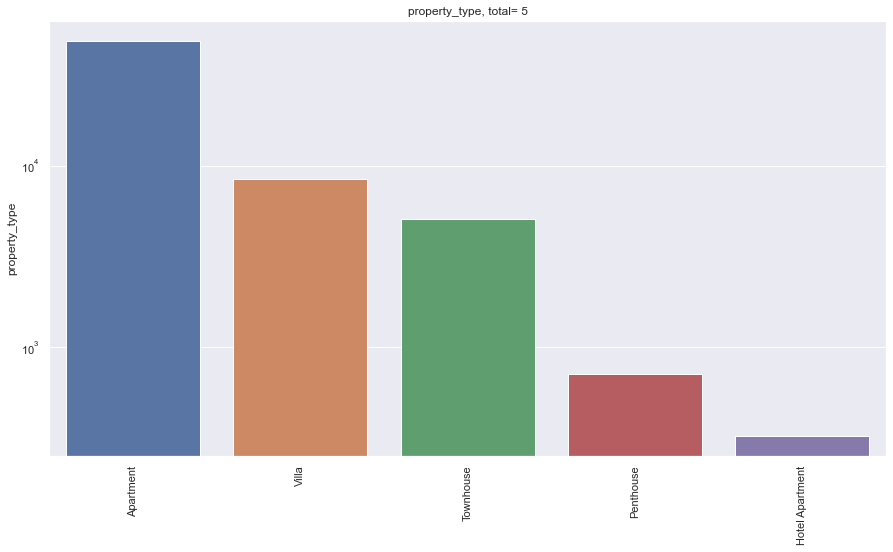

In [100]:
# BUY
sns.set(rc = {'figure.figsize':(15,8)})
df_cat = filtered_buy[['location','property_type']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_yscale('log')
    chart.set(title=f"{i}, total= {len(cat_num)}")
    plt.show()

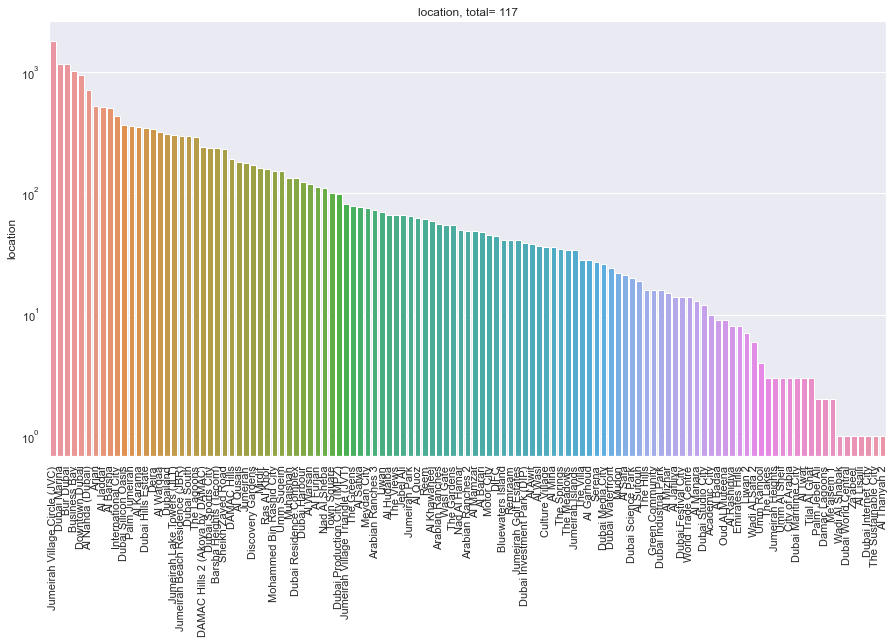

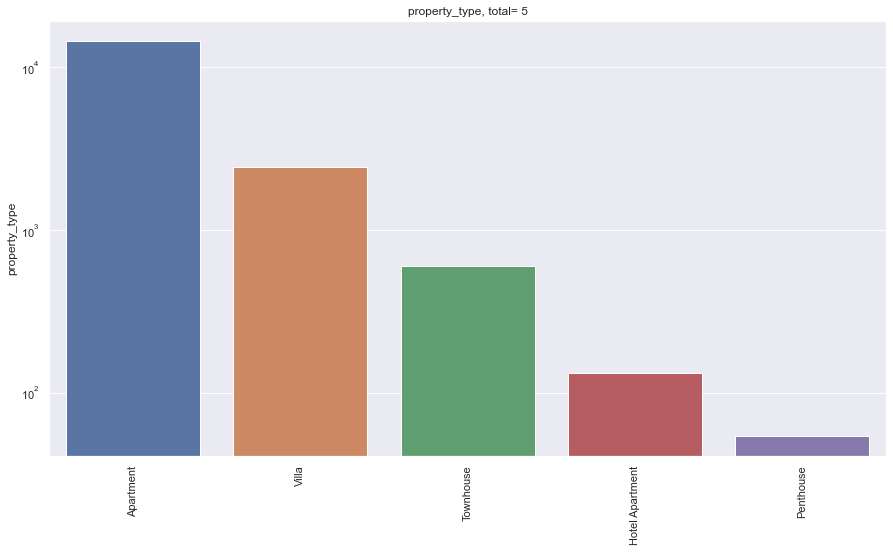

In [101]:
# RENT 
sns.set(rc = {'figure.figsize':(15,8)})
df_cat = filtered_rent[['location','property_type']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_yscale('log')
    chart.set(title=f"{i}, total= {len(cat_num)}")
    plt.show()

# BUY

<AxesSubplot:xlabel='property_type', ylabel='count'>

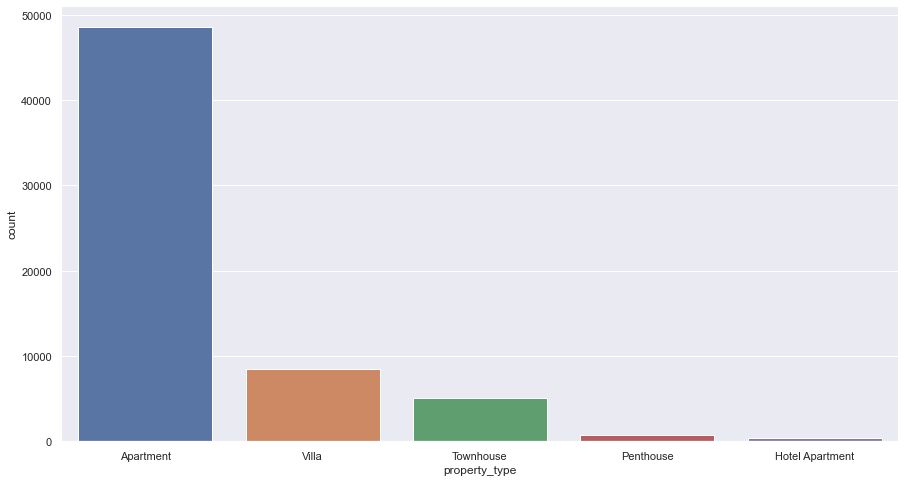

In [102]:
sns.countplot(x='property_type', data=filtered_buy)


<AxesSubplot:xlabel='beds', ylabel='count'>

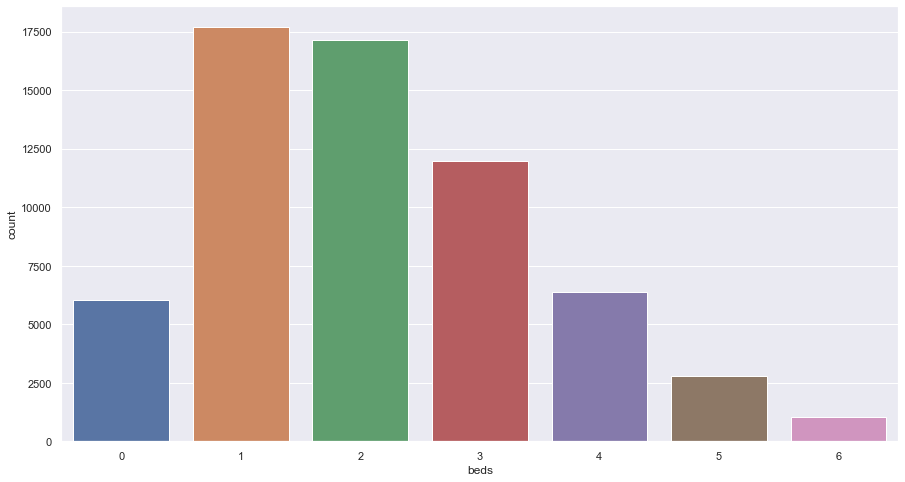

In [103]:
sns.countplot(x='beds', data=filtered_buy)

<AxesSubplot:xlabel='baths', ylabel='count'>

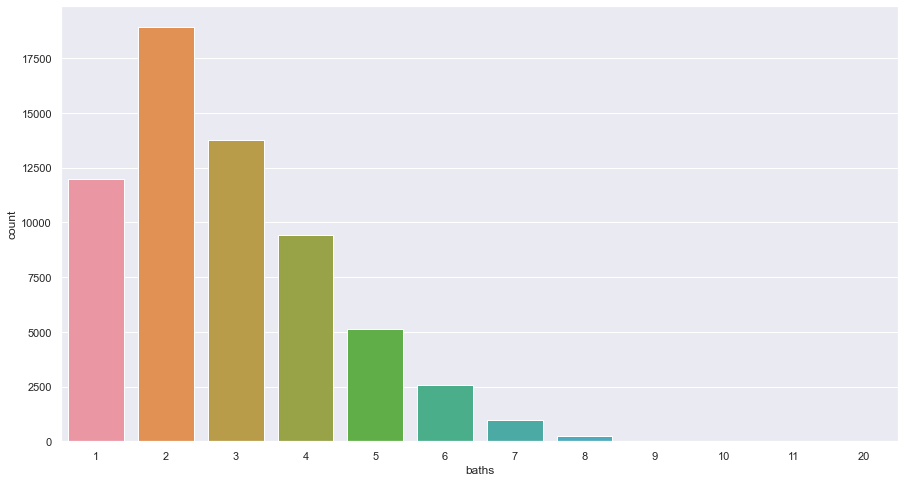

In [104]:
sns.countplot(x='baths', data=filtered_buy)

In [105]:
def check_missing_values(df):
    missing_values = df.isna().sum()
    total_values = df.shape[0]
    missing_values_percentage = (missing_values/total_values) * 100
    return missing_values, missing_values_percentage

    missing_values, missing_values_percentage = check_missing_values(df)
    print(missing_values)
    print(missing_values_percentage)

In [106]:
check_missing_values(df)

(location                 0
 agent_name           45291
 amenities            25121
 description            923
 property_type            0
 status                   0
 reference_number         0
 furnishing               0
 availability_date        0
 price_aed                0
 beds                     0
 baths                    0
 size_sqft                2
 size_sqm                 2
 price_eur                0
 price_usd                0
 price_sek                0
 price_rub                0
 sqm_price_sek            2
 sqm_price_usd            2
 dtype: int64,
 location              0.000000
 agent_name           56.069178
 amenities            31.099199
 description           1.142652
 property_type         0.000000
 status                0.000000
 reference_number      0.000000
 furnishing            0.000000
 availability_date     0.000000
 price_aed             0.000000
 beds                  0.000000
 baths                 0.000000
 size_sqft             0.002476
 size_sqm

# Missing Values

In [107]:
len(df)

80777

In [108]:
df = df.dropna(subset=['size_sqft', 'size_sqm'])

In [109]:
len(df)

80775

In [110]:
check_missing_values(df)

(location                 0
 agent_name           45290
 amenities            25120
 description            923
 property_type            0
 status                   0
 reference_number         0
 furnishing               0
 availability_date        0
 price_aed                0
 beds                     0
 baths                    0
 size_sqft                0
 size_sqm                 0
 price_eur                0
 price_usd                0
 price_sek                0
 price_rub                0
 sqm_price_sek            0
 sqm_price_usd            0
 dtype: int64,
 location              0.000000
 agent_name           56.069328
 amenities            31.098731
 description           1.142680
 property_type         0.000000
 status                0.000000
 reference_number      0.000000
 furnishing            0.000000
 availability_date     0.000000
 price_aed             0.000000
 beds                  0.000000
 baths                 0.000000
 size_sqft             0.000000
 size_sqm

In [111]:
# Changing NaN values to None in agent_name, amenities, description
df[['agent_name','amenities','description']] = df[['agent_name','amenities','description']].fillna(value='Unknown')
check_missing_values(df)

(location             0
 agent_name           0
 amenities            0
 description          0
 property_type        0
 status               0
 reference_number     0
 furnishing           0
 availability_date    0
 price_aed            0
 beds                 0
 baths                0
 size_sqft            0
 size_sqm             0
 price_eur            0
 price_usd            0
 price_sek            0
 price_rub            0
 sqm_price_sek        0
 sqm_price_usd        0
 dtype: int64,
 location             0.0
 agent_name           0.0
 amenities            0.0
 description          0.0
 property_type        0.0
 status               0.0
 reference_number     0.0
 furnishing           0.0
 availability_date    0.0
 price_aed            0.0
 beds                 0.0
 baths                0.0
 size_sqft            0.0
 size_sqm             0.0
 price_eur            0.0
 price_usd            0.0
 price_sek            0.0
 price_rub            0.0
 sqm_price_sek        0.0
 sqm_price_

In [112]:
df.amenities.value_counts()

Unknown               25120
Freehold              14062
View                   8404
24 Hours Concierge     5935
Maids Room             4017
                      ...  
: 36                      1
: 54                      1
: 33                      1
: 2024                    1
: 2023                    1
Name: amenities, Length: 90, dtype: int64

# Outliers

Removing Price outliers based on SQM Price in SEK and Location: separately For SALE and For RENT.

In [113]:
df.sqm_price_sek.describe()

count    8.077500e+04
mean     4.284097e+04
std      7.481712e+04
min      3.100000e+01
25%      1.857800e+04
50%      3.510100e+04
75%      5.835600e+04
max      1.797468e+07
Name: sqm_price_sek, dtype: float64

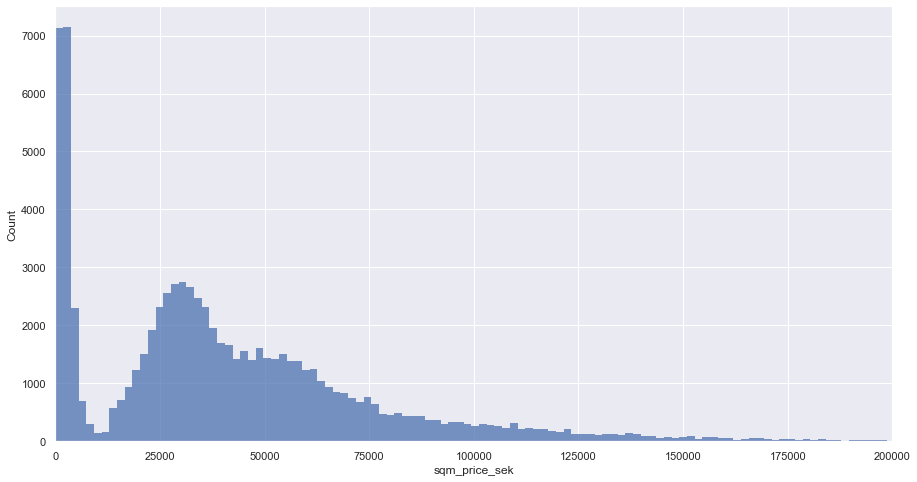

In [114]:
fig, ax = plt.subplots()
sns.histplot(df.sqm_price_sek)
ax.set_xlim(0,200000)
plt.show()

In [115]:
# DF For SALE analysis
# filter rows where status is For Sale
temp_sqmp_buy = df[df['status'] == 'For Sale']

# DF For RENT analysis
# filter rows where status is For Rent
temp_sqmp_rent = df[df['status'] == 'For Rent']

In [116]:
print(f"So far, we have {len(df)} observations.")

So far, we have 80775 observations.


In [117]:
# Outliers - Price per SQFT in For Sale
def remove_price_persqft_outliers(df):
    outliers = []
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.sqm_price_sek)
        st = np.std(subdf.sqm_price_sek)
        outliers.extend(subdf[(subdf.sqm_price_sek<=(m-st)) | (subdf.sqm_price_sek>(m+st))].index.tolist())
    return outliers
    

In [118]:
# For Sale outliers drop based by Location
before_out_rem = len(df)
outlier_indexes = remove_price_persqft_outliers(temp_sqmp_buy)
df = df.drop(index=outlier_indexes)
after_out_rem = len(df)
for_sale_outliers_dropped = before_out_rem-after_out_rem
#print('Outliers removed:',for_sale_outliers_dropped)

In [119]:
# For RENT outliers drop based by Location
before_out_rem = len(df)
outlier_indexes = remove_price_persqft_outliers(temp_sqmp_rent)
df = df.drop(index=outlier_indexes)
after_out_rem = len(df)
for_rent_outliers_dropped = before_out_rem-after_out_rem
#print('Outliers removed:',for_rent_outliers_dropped)

In [120]:
print('For Sale outliers dropped:', for_sale_outliers_dropped)
print('For Rent outliers dropped:', for_rent_outliers_dropped)

For Sale outliers dropped: 11839
For Rent outliers dropped: 3334


In [121]:
df.sqm_price_sek.describe()

count     65602.000000
mean      40321.430993
std       31747.509780
min         239.000000
25%       19254.000000
50%       35035.000000
75%       57321.000000
max      306720.000000
Name: sqm_price_sek, dtype: float64

In [122]:
# DF For SALE analysis
# filter rows where status is For Sale
temp_dfbuy = df[df['status'] == 'For Sale']

# DF For RENT analysis
# filter rows where status is For Rent
temp_dfrent = df[df['status'] == 'For Rent']

In [123]:
def detect_outliers(df, column):
    z_scores = np.abs(zscore(df[column]))
    outliers = df[(z_scores > 3)]
    outlier_indexes = outliers.index.tolist()
    return outlier_indexes

In [124]:
# Removing Price outliers on For Sale
#before_out_rem = len(df)
#outlier_indexes = detect_outliers(temp_dfbuy, 'price_aed')
#df = df.drop(index=outlier_indexes)
#after_out_rem = len(df)
#print('Outliers removed:',before_out_rem-after_out_rem)

In [125]:
# Removing Price outliers on For Rent
#before_out_rem = len(df)
#outlier_indexes = detect_outliers(temp_dfrent, 'price_aed')
#df = df.drop(index=outlier_indexes)
#after_out_rem = len(df)
#print('Outliers removed:',before_out_rem-after_out_rem)

In [126]:
len(df)

65602

In [127]:
# DF For SALE analysis
# filter rows where status is For Sale
temp_dfbuy = df[df['status'] == 'For Sale']

# DF For RENT analysis
# filter rows where status is For Rent
temp_dfrent = df[df['status'] == 'For Rent']

In [128]:
temp_dfbuy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,51228,102,Downtown Dubai,5539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agent_name,51228,3761,Unknown,30561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,51228,74,Unknown,17590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,51228,26051,Property Details:,2263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,51228,5,Apartment,40480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,51228,1,For Sale,51228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reference_number,51228,50690,Bayut - 100038-S-OP,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furnishing,51228,3,Unknown,22583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_date,51228,2,Ready,30636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_aed,51228.0,NaN,NaN,NaN,3027308.146795,4935152.375063,160000.0,1040000.0,1899999.0,3200000.0,120000000.0


In [129]:
temp_dfrent.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,14374,109,Jumeirah Village Circle (JVC),1591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agent_name,14374,2300,Unknown,6042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,14374,72,Unknown,2692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,14374,7408,Property Details:,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,14374,5,Apartment,12033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,14374,1,For Rent,14374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reference_number,14374,14311,Bayut - MR MUDASSAR,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furnishing,14374,3,Unfurnished,10376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_date,14374,366,"January 13, 2023",408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_aed,14374.0,NaN,NaN,NaN,136093.921942,176903.734424,15000.0,55000.0,80000.0,150000.0,3400000.0


Size outliers

In [130]:
# Removing Price outliers on For Sale
before_out_rem = len(df)
outlier_indexes = detect_outliers(temp_dfbuy, 'size_sqft')
#df = df.drop(index=outlier_indexes)
after_out_rem = len(df)
print('Outliers removed:',before_out_rem-after_out_rem)

Outliers removed: 0


In [131]:
# Removing Price outliers on For Rent
before_out_rem = len(df)
outlier_indexes = detect_outliers(temp_dfrent, 'size_sqft')
#df = df.drop(index=outlier_indexes)
after_out_rem = len(df)
print('Outliers removed:',before_out_rem-after_out_rem)

Outliers removed: 0


In [132]:
# DF For SALE analysis
# filter rows where status is For Sale
temp_dfbuy = df[df['status'] == 'For Sale']

# DF For RENT analysis
# filter rows where status is For Rent
temp_dfrent = df[df['status'] == 'For Rent']

In [133]:
temp_dfbuy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,51228,102,Downtown Dubai,5539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agent_name,51228,3761,Unknown,30561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,51228,74,Unknown,17590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,51228,26051,Property Details:,2263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,51228,5,Apartment,40480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,51228,1,For Sale,51228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reference_number,51228,50690,Bayut - 100038-S-OP,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furnishing,51228,3,Unknown,22583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_date,51228,2,Ready,30636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_aed,51228.0,NaN,NaN,NaN,3027308.146795,4935152.375063,160000.0,1040000.0,1899999.0,3200000.0,120000000.0


In [134]:
temp_dfrent.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,14374,109,Jumeirah Village Circle (JVC),1591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agent_name,14374,2300,Unknown,6042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,14374,72,Unknown,2692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,14374,7408,Property Details:,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,14374,5,Apartment,12033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,14374,1,For Rent,14374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reference_number,14374,14311,Bayut - MR MUDASSAR,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furnishing,14374,3,Unfurnished,10376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_date,14374,366,"January 13, 2023",408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_aed,14374.0,NaN,NaN,NaN,136093.921942,176903.734424,15000.0,55000.0,80000.0,150000.0,3400000.0


In [135]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,65602,119,Jumeirah Village Circle (JVC),6693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agent_name,65602,4850,Unknown,36603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,65602,84,Unknown,20282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,65602,32411,Property Details:,2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,65602,5,Apartment,52513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,65602,2,For Sale,51228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reference_number,65602,64987,Bayut - Aakib Shaikh,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furnishing,65602,3,Unfurnished,29754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_date,65602,368,Ready,30636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_aed,65602.0,NaN,NaN,NaN,2393816.587574,4522854.260386,15000.0,475000.0,1400000.0,2695620.0,120000000.0


# Feature Engineering

In [136]:
# POOL
df['pool'] = df.apply(lambda x: 1 if 'pool' in x.description.lower() or 'pool' in x.amenities.lower() else 0  ,axis=1)
df.pool.value_counts()

0    63505
1     2097
Name: pool, dtype: int64

In [137]:
# BALCONY

df['balcony'] = df.apply(lambda x: 1 
                         if 'balcony' in x.description.lower() or 'terrace' in x.description.lower()
                         or 'balcony' in x.amenities.lower()  or 'terrace' in x.amenities.lower()
                         else 0  ,axis=1)
df.balcony.value_counts()

0    61669
1     3933
Name: balcony, dtype: int64

In [138]:
# Maid's room
df['maid'] = df.apply(lambda x: 1 
                         if 'maid' in x.description.lower() 
                         or 'maid' in x.amenities.lower()
                         else 0  ,axis=1)
df.maid.value_counts()

0    61262
1     4340
Name: maid, dtype: int64

In [139]:
# Gym
df['gym'] = df.apply(lambda x: 1 
                         if 'gym' in x.description.lower() or 'fitness' in x.description.lower() or 'gymnasium' in x.description.lower() 
                         or 'gym' in x.amenities.lower() or 'fitness' in x.amenities.lower() or 'gymnasium' in x.amenities.lower() 
                         else 0  ,axis=1)
df.gym.value_counts()

0    63894
1     1708
Name: gym, dtype: int64

In [140]:
# Brand New
df['brand_new'] = df.apply(lambda x: 1 
                         if 'brand new' in x.description.lower()
                         or 'brand new' in x.amenities.lower() 
                         else 0  ,axis=1)
df.brand_new.value_counts()

0    64859
1      743
Name: brand_new, dtype: int64

In [141]:
# Burj Khalifa View
df['burj_view'] = df.apply(lambda x: 1 
                         if ('burj khalifa' in x.description.lower() and 'view' in x.description.lower())
                         or ('burj khalifa' in x.amenities.lower()  and 'view' in x.amenities.lower())
                         else 0  ,axis=1)
df.burj_view.value_counts()

0    65037
1      565
Name: burj_view, dtype: int64

In [142]:
# Furnished
df['furnished'] = df.apply(lambda x: 1 
                         if ('furnished' in x.furnishing.lower())
                         else 0  ,axis=1)
df.furnished.value_counts()

1    42741
0    22861
Name: furnished, dtype: int64

In [143]:
# Ready
df['ready'] = df.apply(lambda x: 1 
                         if ('ready' in x.availability_date.lower())
                         else 0  ,axis=1)
df.ready.value_counts()

0    34966
1    30636
Name: ready, dtype: int64

In [144]:
df.amenities.value_counts().head(10)

Unknown               20282
Freehold              11519
View                   6750
24 Hours Concierge     5042
Maids Room             3143
CCTV Security          3126
Intercom               2667
Balcony or Terrace     2225
Furnished              1998
Security Staff         1045
Name: amenities, dtype: int64

In [145]:
# Freehold
df['freehold'] = df.apply(lambda x: 1 
                         if ('freehold' in x.amenities.lower())
                         else 0  ,axis=1)
df.freehold.value_counts()

0    54083
1    11519
Name: freehold, dtype: int64

In [146]:
# Concierge
df['concierge'] = df.apply(lambda x: 1 
                         if ('concierge' in x.amenities.lower())
                         else 0  ,axis=1)
df.concierge.value_counts()

0    60560
1     5042
Name: concierge, dtype: int64

In [147]:
# Security
df['security'] = df.apply(lambda x: 1 
                         if ('security' in x.amenities.lower())
                         else 0  ,axis=1)
df.security.value_counts()

0    61431
1     4171
Name: security, dtype: int64

In [148]:
# Intercom
df['intercom'] = df.apply(lambda x: 1 
                         if ('intercom' in x.amenities.lower())
                         else 0  ,axis=1)
df.intercom.value_counts()

0    62935
1     2667
Name: intercom, dtype: int64

In [149]:
# Sea View
df['sea_view'] = df.apply(lambda x: 1 
                         if 'sea view' in x.description.lower() 
                         or 'sea view' in x.amenities.lower()
                         else 0  ,axis=1)
df.sea_view.value_counts()

0    65298
1      304
Name: sea_view, dtype: int64

In [150]:
# At beach or close to beach
df['beach'] = df.apply(lambda x: 1 
                         if 'beach'in x.description.lower()
                         or 'beach'  in x.amenities.lower() 
                         else 0  ,axis=1)
df.beach.value_counts()

0    64154
1     1448
Name: beach, dtype: int64

In [151]:
df.columns

Index(['location', 'agent_name', 'amenities', 'description', 'property_type',
       'status', 'reference_number', 'furnishing', 'availability_date',
       'price_aed', 'beds', 'baths', 'size_sqft', 'size_sqm', 'price_eur',
       'price_usd', 'price_sek', 'price_rub', 'sqm_price_sek', 'sqm_price_usd',
       'pool', 'balcony', 'maid', 'gym', 'brand_new', 'burj_view', 'furnished',
       'ready', 'freehold', 'concierge', 'security', 'intercom', 'sea_view',
       'beach'],
      dtype='object')

# Dividing Datasets

In [152]:
df_sale = df.loc[df['status'] == 'For Sale']
df_rent = df.loc[df['status'] == 'For Rent']
print("For Sale dataset:", len(df_sale))
print("For Rent dataset:", len(df_rent))

For Sale dataset: 51228
For Rent dataset: 14374


In [153]:
df_sale.columns

Index(['location', 'agent_name', 'amenities', 'description', 'property_type',
       'status', 'reference_number', 'furnishing', 'availability_date',
       'price_aed', 'beds', 'baths', 'size_sqft', 'size_sqm', 'price_eur',
       'price_usd', 'price_sek', 'price_rub', 'sqm_price_sek', 'sqm_price_usd',
       'pool', 'balcony', 'maid', 'gym', 'brand_new', 'burj_view', 'furnished',
       'ready', 'freehold', 'concierge', 'security', 'intercom', 'sea_view',
       'beach'],
      dtype='object')

In [154]:
df_sale.head().T

,0,1,2,3,4
location,Palm Jumeirah,Dubai Marina,Arjan,Downtown Dubai,Business Bay
agent_name,Unknown,Rebecca Boulcott,Unknown,Unknown,Unknown
amenities,Unknown,View,Unknown,View,Sauna
description,Now available is this well sized 3 Bedroom apa...,- Vacant On Transfer,Jake and haus & haus are delighted to present ...,Property Details:,"and Residences , A luxury hotel and residenti..."
property_type,Apartment,Apartment,Apartment,Apartment,Apartment
status,For Sale,For Sale,For Sale,For Sale,For Sale
reference_number,Bayut - DUB225679,Bayut - L-202420,Bayut - EMI220812,Bayut - MB-S-2302,Bayut - B-AS-69825
furnishing,Unknown,Unknown,Unknown,Furnished,Unknown
availability_date,Ready,Ready,Ready,Ready,Ready
price_aed,4600000.0,2000000.0,740000.0,9999900.0,2450000.0


Let's drop some columns in DF FOR SALE

In [155]:
df_sale.drop(columns=['size_sqm','furnishing', 'amenities', 'availability_date','agent_name','description','status','reference_number','price_eur','price_usd','price_sek','price_rub','sqm_price_sek','sqm_price_usd'], inplace=True)

In [156]:
df_sale.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location,51228,102,Downtown Dubai,5539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,51228,5,Apartment,40480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_aed,51228.0,NaN,NaN,NaN,3027308.146795,4935152.375063,160000.0,1040000.0,1899999.0,3200000.0,120000000.0
beds,51228.0,NaN,NaN,NaN,2.028383,1.31974,0.0,1.0,2.0,3.0,6.0
baths,51228.0,NaN,NaN,NaN,2.740611,1.432081,1.0,2.0,2.0,4.0,10.0
size_sqft,51228.0,NaN,NaN,NaN,1761.904544,3025.203817,247.0,800.0,1231.0,1970.0,536112.0
pool,51228.0,NaN,NaN,NaN,0.031565,0.17484,0.0,0.0,0.0,0.0,1.0
balcony,51228.0,NaN,NaN,NaN,0.067424,0.250757,0.0,0.0,0.0,0.0,1.0
maid,51228.0,NaN,NaN,NaN,0.060065,0.237609,0.0,0.0,0.0,0.0,1.0
gym,51228.0,NaN,NaN,NaN,0.027036,0.16219,0.0,0.0,0.0,0.0,1.0


In [157]:
# correlation function:

def ranking(y, title='', xlabel='', ylabel=''):
    y_pos = np.arange(len(y),0,-1)
    plt.figure(figsize=(5,5))
    cmap = ListedColormap(sns.color_palette("GnBu_d"))
    bar_colors = cmap(y.values)
    plt.barh(y_pos, width=y, height=0.6, left=None, align='center', color=bar_colors, alpha = 0.8)
    plt.yticks(y_pos, y.index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for p, c, ch in zip(y_pos, y.index, round(y,4)):
        plt.annotate(str(ch), xy=(ch if ch>0 else 0, p), va='center')

# Correlation matrix (non-categorical features)

/var/folders/4q/l1tfyywx30n9rpytny0t00h80000gn/T/ipykernel_56523/1616815316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ranking(df_sale.corr()['price_aed'], 'Correlation between features and target feature','Correlation', 'Features')


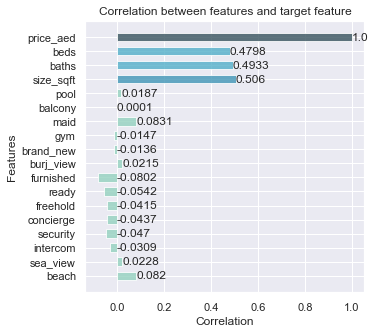

In [158]:
ranking(df_sale.corr()['price_aed'], 'Correlation between features and target feature','Correlation', 'Features')

# Correlation Matrix (including Categorical features)

interval columns not set, guessing: ['price_aed', 'beds', 'baths', 'size_sqft', 'pool', 'balcony', 'maid', 'gym', 'brand_new', 'burj_view', 'furnished', 'ready', 'freehold', 'concierge', 'security', 'intercom', 'sea_view', 'beach']


/var/folders/4q/l1tfyywx30n9rpytny0t00h80000gn/T/ipykernel_56523/1487738926.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  price_corr = df_sale.corr()['price_aed'].drop('price_aed')


' print(price_corr) '

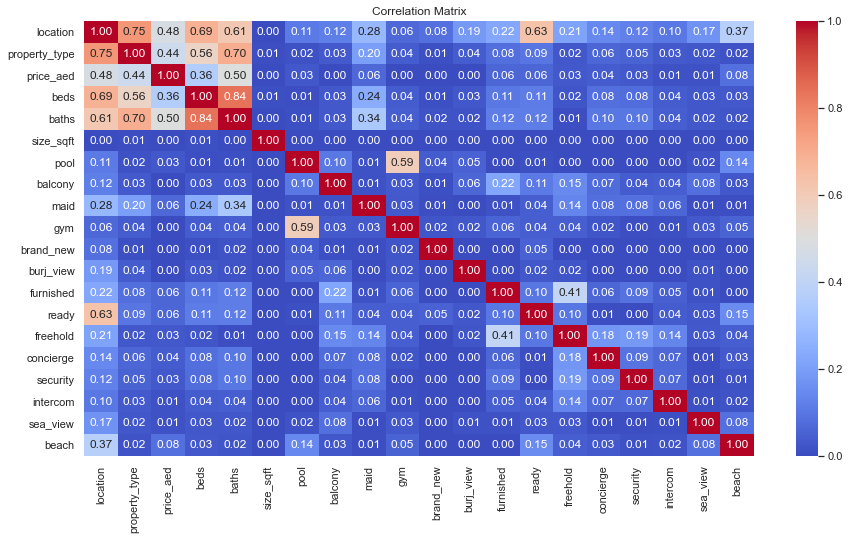

In [160]:
# compute the correlation matrix using phik
corr_matrix = phik_matrix(df_sale)

# plot the correlation matrix as a heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# set plot title
plt.title('Correlation Matrix')

# compute the correlations between the features and price_aed
price_corr = df_sale.corr()['price_aed'].drop('price_aed')

# print the correlations between the features and price_aed
""" print(price_corr) """

In [161]:
# compute the correlation matrix using phik
corr_matrix = phik_matrix(df_sale)

# compute the correlations between the features and price_aed
price_corr = corr_matrix['price_aed'].drop('price_aed')

# sort the correlation coefficients in descending order
price_corr_sorted = price_corr.sort_values(ascending=False)

# print the sorted correlation coefficients to the console
print(price_corr_sorted)


interval columns not set, guessing: ['price_aed', 'beds', 'baths', 'size_sqft', 'pool', 'balcony', 'maid', 'gym', 'brand_new', 'burj_view', 'furnished', 'ready', 'freehold', 'concierge', 'security', 'intercom', 'sea_view', 'beach']
baths            0.499222
location         0.479264
property_type    0.443685
beds             0.361736
beach            0.083796
maid             0.063894
ready            0.062203
furnished        0.059634
concierge        0.036183
freehold         0.030556
security         0.027502
pool             0.026939
intercom         0.013662
sea_view         0.013416
balcony          0.001727
gym              0.000000
size_sqft        0.000000
burj_view        0.000000
brand_new        0.000000
Name: price_aed, dtype: float64


The most important features that are correlated with the property price in the UAE are `size_sqft`, `baths`, and `beds` (non-categorical features) and `location` and `property_type` (categorical features). The correlation coefficients suggest that these features have the strongest impact on the *property price*.

Furthermore, the number of beds and baths are also highly correlated with each other, as well as with the property's location and property type. This suggests that the location and property type are highly important factors. In summary, **the most important factors that affect the pricing of properties in the UAE are `size_sqft`, `location`, and `property_type`**. These features have the strongest correlation with the property price.

# Output

In [162]:
df_sale['size_sqft'].sort_values().tail(1000)

81335       7311.0
80640       7311.0
121999      7320.0
69849       7326.0
71959       7330.0
            ...   
87094      26514.0
76811      26515.0
70347      41000.0
73685      41000.0
79873     536112.0
Name: size_sqft, Length: 1000, dtype: float64

In [163]:
df_sale.to_csv('df_dubai_final_for_sale.csv',index=False)